## 21.04.24 주간발표
- 1. PyMC3 API 사용 조사 및 Example
- 2. Text기반 사전확률 모델 적용하기 위한 분포화 

<hr>

## PyMc3
- PyMC3는 Python 기반의 확률 프로그래밍 패키지로, 사용자가 다양한 수치 방법, 특히 MCMC (Markov chain Monte Carlo) 및 VI (variational inference)를 사용하여 베이지안 모델을 생성 가능
- Github : https://github.com/pymc-devs/pymc3
- Theano Backend 기반
    - Theano란 : 다차원과 관련된 수학적 표현을 정의, 최적화 및 효율적으로 평가할 수있는 Python 라이브러리, 2017년 개발 중단됨
- Theano인 Fork version인 **Theano-PyMC 를 사용**
    - Theano-PyMC : https://github.com/pymc-devs/aesara
    
## Environment Setting
- Install
    - linux, mac, windows 지원
    - conda install -c conda-forge pymc3
    - https://github.com/pymc-devs/pymc3/wiki/Installation-Guide-(Windows) 
    
## References
- PyMC API
    - https://docs.pymc.io/api.html
- API Quickstart
    - https://docs.pymc.io/pymc-examples/examples/pymc3_howto/api_quickstart.html 
- 프로그래머를 위한 베이지안 with 파이썬
    - https://github.com/ExcelsiorCJH/Bayesian-with-Python
    
<hr>

![api](img/api.PNG)

## PyMC 모델 생성
- PyMC3 라이브러리
- PyMC3의 Model 클래스를 생성
- 기본적으로 Model에 사용되는 변수는 확률 변수
    - **Continus Distribution (연속 분포)**
        - pymc3.distributions.continuous.py 에 class들로 정의
        - 정규 분포, 연속균등분포, 카이제곱 분포, 감마 분포
        
    - **Discrete Distribution (이산 분포)**
        - pymc3.distributions.discrete.py 에 class들로 정의
        - 이산균등분포, 푸아송 분포, 베르누이 분포, 기하 분포, 이항 분포, 다항 분포

## Case 1. 확률변수

In [5]:

# import library
import numpy as np
import pymc3 as pm

# 기본적으로 Model에 사용되는 변수는 확률 변수
with pm.Model() as model:
    # 정규분포
    var = pm.Normal('정규분포', mu = 0, sigma=1) # tt.as_tensor_variable(floatX(mu)), mean

var

정규분포 ~ Normal

## Case 2. 연속분포, 이산분포

In [6]:
# 기본적으로 Model에 사용되는 변수는 확률 변수
with pm.Model() as model:
    # 연속 분포
    con1 = pm.Normal('정규분포', mu = 0, sigma=1)
    con2 = pm.Gamma('감마분포', mu = 1, sigma=0.1)
    
    # 이산 분포
    dis1 = pm.Poisson('푸아송분포', mu=2)
    dis2 = pm.Bernoulli('베르누이분포', p=0.5)

print('Model Named_Vars:', type(model.named_vars))
model.named_vars

Model Named_Vars: <class 'pymc3.model.treedict'>


{'정규분포': 정규분포 ~ Normal,
 '감마분포_log__': 감마분포_log__ ~ TransformedDistribution,
 '감마분포': 감마분포 ~ Gamma,
 '푸아송분포': 푸아송분포 ~ Poisson,
 '베르누이분포': 베르누이분포 ~ Bernoulli}

## Case 3. Model 생성 - Free, Observed
- model.basic_RVs, model.free_RVs, model.observed_RVs
- Basic : 전체 변수
- Free : 사전 확률 분포 정의만
- Observed : 사전 확률 분포에 관측값 포함


In [7]:
# 기본적으로 Model에 사용되는 변수는 확률 변수
with pm.Model() as model:
    # 관측값 여부
    con1 = pm.Normal('정규분포', mu = 0, sigma=1)
    con2 = pm.Normal('정규분포_obs', mu = 0, sigma=1, observed = np.random.randn(100))

print('Model Random Variables: ', model.basic_RVs) 
print('Model Free Random Variables:', model.free_RVs) # no values
print('Model Observed Random Variables:',model.observed_RVs) # fixed values

Model Random Variables:  [정규분포 ~ Normal, 정규분포_obs ~ Normal]
Model Free Random Variables: [정규분포 ~ Normal]
Model Observed Random Variables: [정규분포_obs ~ Normal]


## Case 4. Initialization with test_values
- 테스트 값 초기화

In [8]:
with pm.Model():
    x = pm.Normal("x", mu=0, sigma=1, shape=5)
    x2 = pm.Normal("x2", mu=0, sigma=1, observed = np.random.randn(3))
    
print(x.tag.test_value)
print(x2.tag.test_value)

[0. 0. 0. 0. 0.]
[-0.06616232  0.51557348 -0.98819351]


## Case 5. Deterministics transforms
- 확률 변수들에 대해 자유롭게 대수 연산 수행
- PyMC3 allows you to freely do algebra with RVs in all kinds of ways:
- pm.Deterministic 사용해서 가능

In [9]:
# Deterministic wrapper - 변수단에서 해결하는
with pm.Model() as model:
    x = pm.Normal("x", mu=0, sigma=1, observed = np.random.randn(3))
    plus_2 = pm.Deterministic("x plus 2", x + 2)
    sub_2 = pm.Deterministic("x sub 2", x - 2)
    square_2 = pm.Deterministic("x square 2", x ** 2)
    sined_2 = pm.Deterministic("x sined 2", pm.math.sin(x))
    
# Tracking RVs
print(type(x), x, x.tag.test_value)
print(type(plus_2), plus_2, plus_2.tag.test_value)
print(type(sub_2), sub_2, sub_2.tag.test_value)
print(type(square_2), square_2, square_2.tag.test_value)
print(type(sined_2), sined_2, sined_2.tag.test_value)

<class 'pymc3.model.ObservedRV'> x ~ Normal [ 0.66237552 -0.07516778  0.28939559]
<class 'pymc3.model.DeterministicWrapper'> x plus 2 ~ Deterministic [2.66237552 1.92483222 2.28939559]
<class 'pymc3.model.DeterministicWrapper'> x sub 2 ~ Deterministic [-1.33762448 -2.07516778 -1.71060441]
<class 'pymc3.model.DeterministicWrapper'> x square 2 ~ Deterministic [0.43874133 0.00565019 0.08374981]
<class 'pymc3.model.DeterministicWrapper'> x sined 2 ~ Deterministic [ 0.61499176 -0.07509701  0.285373  ]


## Case 6. Inference 
- Our Model 정의 완료 후 사후 분포를 근사하기 위해 추론을 수행
- PyMC3는 Sampling, Variable Inference라는 2가지 Inference Class 지원

## Case 6.1 Sampling
- MCMC 샘플링 알고리즘 : pm.sample() 함수 사용
- 자동으로 NUTS 샘플러가 효율적이게 할당 (NUTS 가 Default)
- 샘플러에 적합한 시작 매개 변수를 찾기 위해 튜닝을 실행
- 각 체인의 Posterior에서 2000개의 Sample 추출
- 샘플러가 추가로 1500번 반복하여 매개변수 조정

In [10]:
with pm.Model() as model:
    # continuous model
    mu = pm.Normal("mu", mu=0, sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))

    # Posterior 에서 2000개의 Sample 추출,
    # 샘플러가 추가로 15000번 반복하여 매개 변수 조정
    idata = pm.sample(2000, tune=1500, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu]


Sampling 2 chains for 1_500 tune and 2_000 draw iterations (3_000 + 4_000 draws total) took 28 seconds.


In [12]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [11]:
# chain, draw
print(idata.posterior.dims)

# idata의 posterior 평균의 shape
print(idata.posterior["mu"].shape) # 2 chains 2000 iteration

# get values of a single chain
idata.posterior["mu"].sel(chain=1).shape

Frozen(SortedKeysDict({'chain': 2, 'draw': 2000}))
(2, 2000)


(2000,)

### 샘플러
- For almost all continuous models, ``NUTS`` should be preferred
- 일반적으로 연속 모델의 경우 NUTS 가 주로 사용됨
- NUTS 가 비교적 느리기 때문에 보다 복잡한 큰 모델의 경우 Metropolis나 slice를 사용 (더 빠름)

In [13]:
# 샘플러 리스트
list(filter(lambda x: x[0].isupper(), dir(pm.step_methods)))

['BinaryGibbsMetropolis',
 'BinaryMetropolis',
 'CategoricalGibbsMetropolis',
 'CauchyProposal',
 'CompoundStep',
 'DEMetropolis',
 'DEMetropolisZ',
 'DEMetropolisZMLDA',
 'ElemwiseCategorical',
 'EllipticalSlice',
 'HamiltonianMC',
 'LaplaceProposal',
 'MLDA',
 'Metropolis',
 'MetropolisMLDA',
 'MultivariateNormalProposal',
 'NUTS',
 'NormalProposal',
 'PGBART',
 'PoissonProposal',
 'RecursiveDAProposal',
 'Slice',
 'UniformProposal']

### Metropolis 샘플러


In [14]:
with pm.Model() as model:
    
    mu = pm.Normal("mu", mu=0, sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))

    step = pm.Metropolis()
    trace = pm.sample(1000, step=step)

c:\users\urse\anaconda3\envs\untitled\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 22 seconds.
The number of effective samples is smaller than 25% for some parameters.


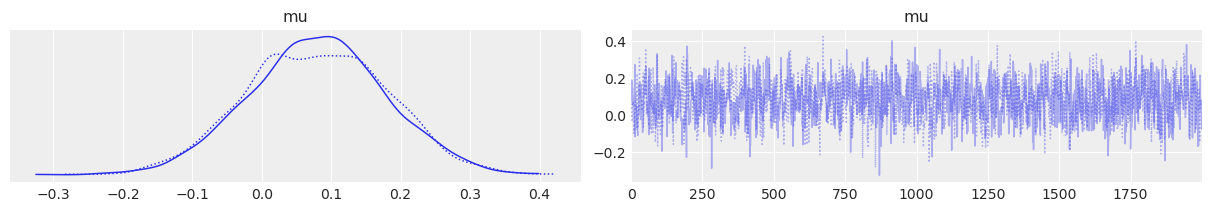

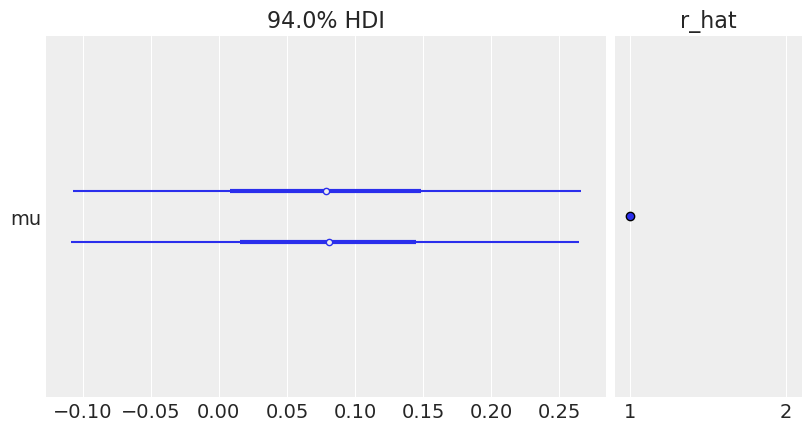

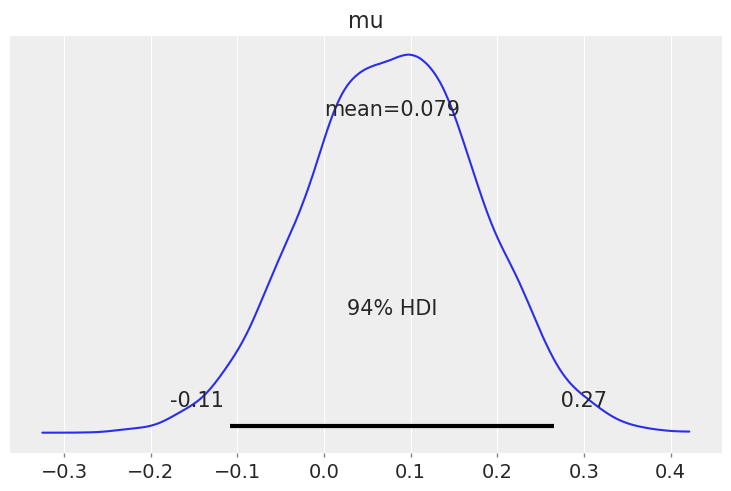

In [16]:
import arviz as az
az.style.use("arviz-darkgrid")

az.plot_trace(idata);

# common metric, R-hat, as Gelman-Rubin statistic
az.summary(idata)

# forestplot
az.plot_forest(idata, r_hat=True);

# posterior plot
az.plot_posterior(idata);


## Case 6.2 Variational inference
- PyMC3는 다양한 Variational Inference Techiniques 지원
- 속도는 더 빠르지만, biased 된 inference 결과를 가져올 수 있음
- pymc3.fit() 로 학습 - advi방법, fullrank_advi 방법 등등
- Approximation 객체로 반환

In [15]:
# Variational Inference 학습 - advi 방법
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    sd = pm.HalfNormal("sd", sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=np.random.randn(100))

    approx = pm.fit()
    
# 체인 1개, 500회 반복, 3개 변수(mu, sd, obs)
approx.sample(500)

Finished [100%]: Average Loss = 147.94


<MultiTrace: 1 chains, 500 iterations, 3 variables>

In [17]:
# Variational Inference 학습 - fullrank_advi 방법 - 공분산행렬 이용
mu = pm.floatX([0.0, 0.0])
cov = pm.floatX([[1, 0.5], [0.5, 1.0]])
with pm.Model() as model:
    pm.MvNormal("x", mu=mu, cov=cov, shape=2)
    approx = pm.fit(method="fullrank_advi")
    
# 체인 1개, 500회 반복, 1개 변수
approx.sample(500)

Finished [100%]: Average Loss = 0.0065707


<MultiTrace: 1 chains, 500 iterations, 1 variables>

## 시각화

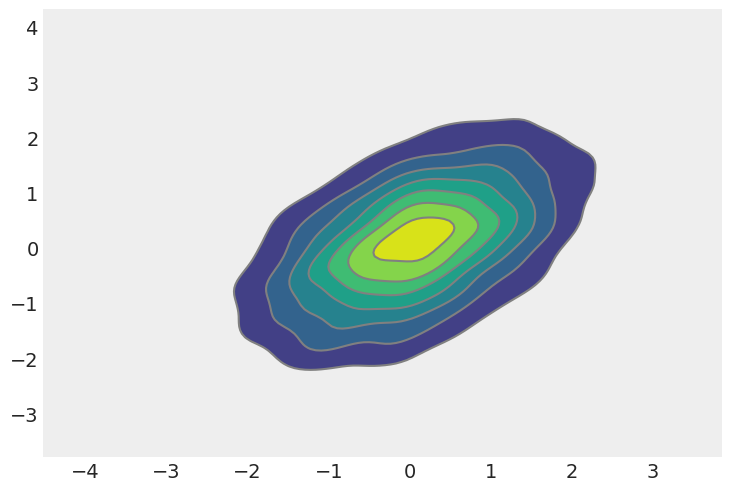

In [19]:
import matplotlib.pyplot as plt
plt.figure()
trace = approx.sample(10000)
az.plot_kde(trace["x"][:, 0], trace["x"][:, 1]);

### SVGD 사후 추정 방법
- Stein Variational Gradient Descent (SVGD) 사후 추정 방법

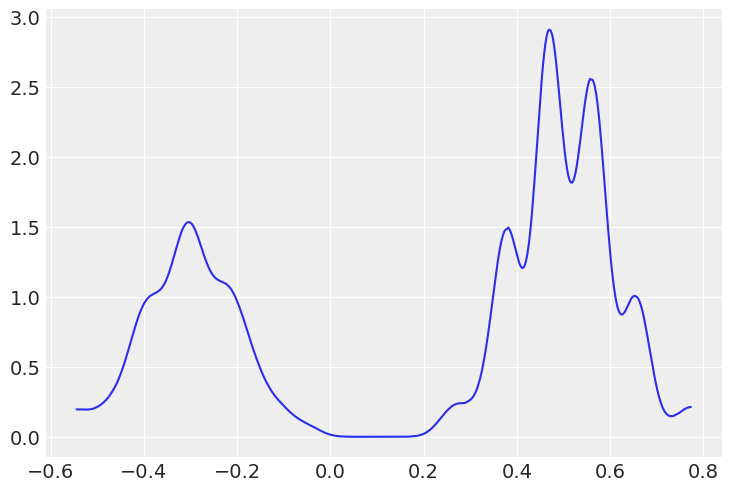

In [20]:
w = pm.floatX([0.2, 0.8])
mu = pm.floatX([-0.3, 0.5])
sd = pm.floatX([0.1, 0.1])
with pm.Model() as model:
    pm.NormalMixture("x", w=w, mu=mu, sigma=sd)
    approx = pm.fit(method=pm.SVGD(n_particles=200, jitter=1.0))
    
plt.figure()
trace = approx.sample(10000)
az.plot_dist(trace["x"]);

## Case 7. Posterior Predictive Sampling
- sample_posterior_predictive() 함수를 통해 사후 예측 검사에 대한 예측을 수행


In [21]:
data = np.random.randn(100)

# NUTS 를 이용한 학습
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    sd = pm.HalfNormal("sd", sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=data)

    idata = pm.sample(return_inferencedata=True)
    
# 사후 예측 결과
with model:
    post_pred = pm.sample_posterior_predictive(idata.posterior)
    
# add posterior predictive to the InferenceData
az.concat(idata, az.from_pymc3(posterior_predictive=post_pred), inplace=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 35 seconds.


c:\users\urse\anaconda3\envs\untitled\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


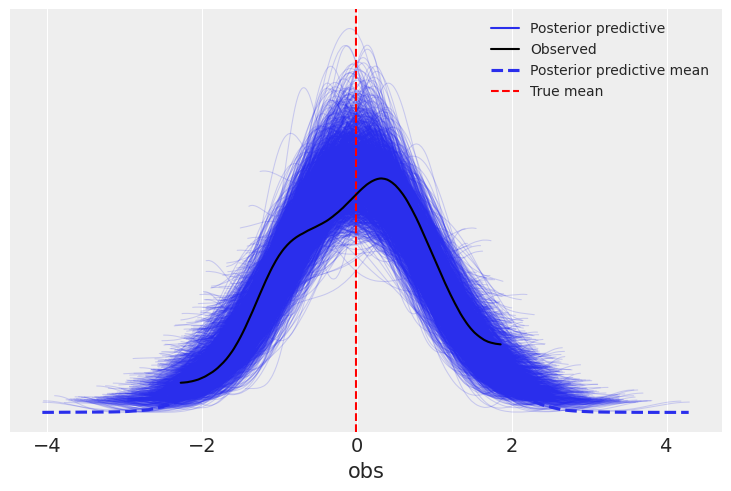

In [22]:
# 관측값, 사후확률 시각화
fig, ax = plt.subplots()
az.plot_ppc(idata, ax=ax)
ax.axvline(data.mean(), ls="--", color="r", label="True mean")
ax.legend(fontsize=10);